In [1]:
# Import useful libraries
# from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters # Register converters
register_matplotlib_converters()

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120}) # Set fig size

In [2]:
# Import as Dataframe
df = pd.read_csv('../data/price_daily.csv', parse_dates=['Date'], index_col='Date')
df.head()

# Check if Dataframe is empty
if df.empty == True:
    print('DataFrame is empty')
else:
    print('DataFrame is not empty')

DataFrame is not empty


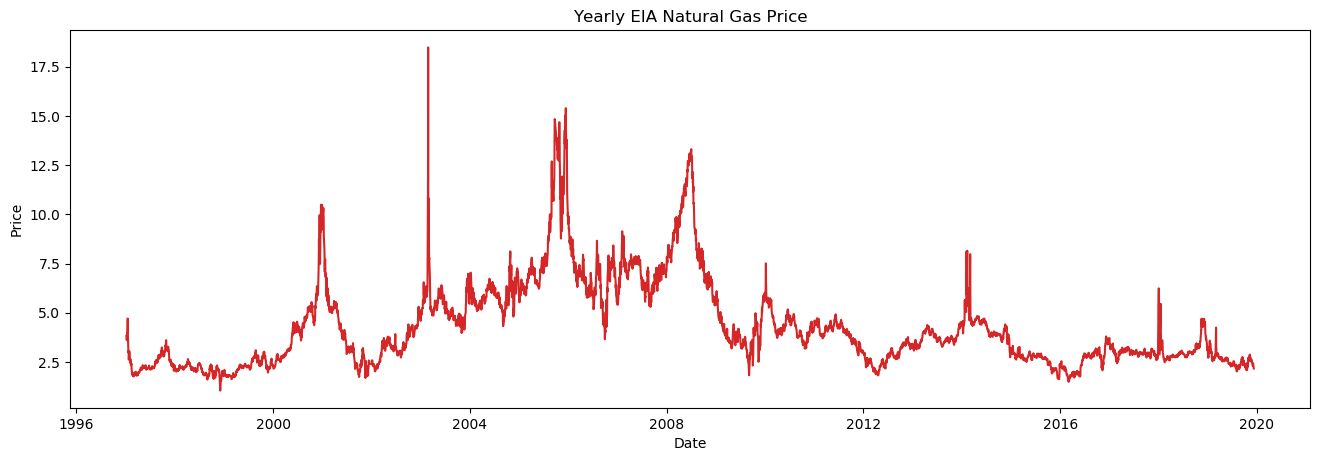

False


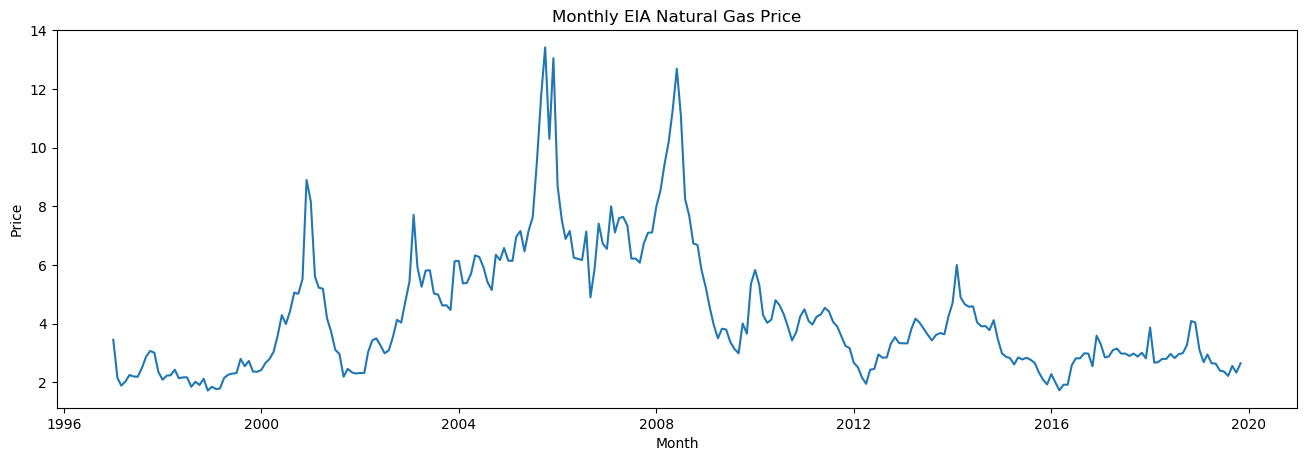

In [3]:
# Time series data source: fpp pacakge in R.
# Visualize Month and yearly data

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Price', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.Price, title='Yearly EIA Natural Gas Price')

df_mon = pd.read_csv('../data/price_monthly.csv', parse_dates=['Month'], index_col='Month')

print(df_mon.empty) # Check empty dataframe 

def plot_df_m(df_mon, x, y, title="", xlabel='Month', ylabel='Price', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df_m(df_mon, x=df_mon.index, y=df_mon.Price, title='Monthly EIA Natural Gas Price')

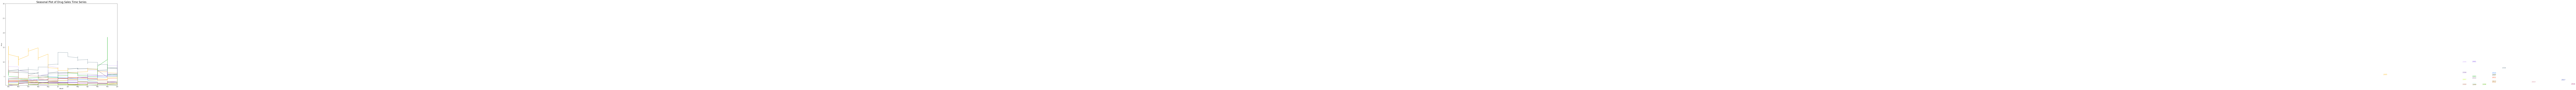

In [4]:
# Seasonal Plot of Natural Gas analysis - Year, Month

# Import Data
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Price', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'Price'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Price$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

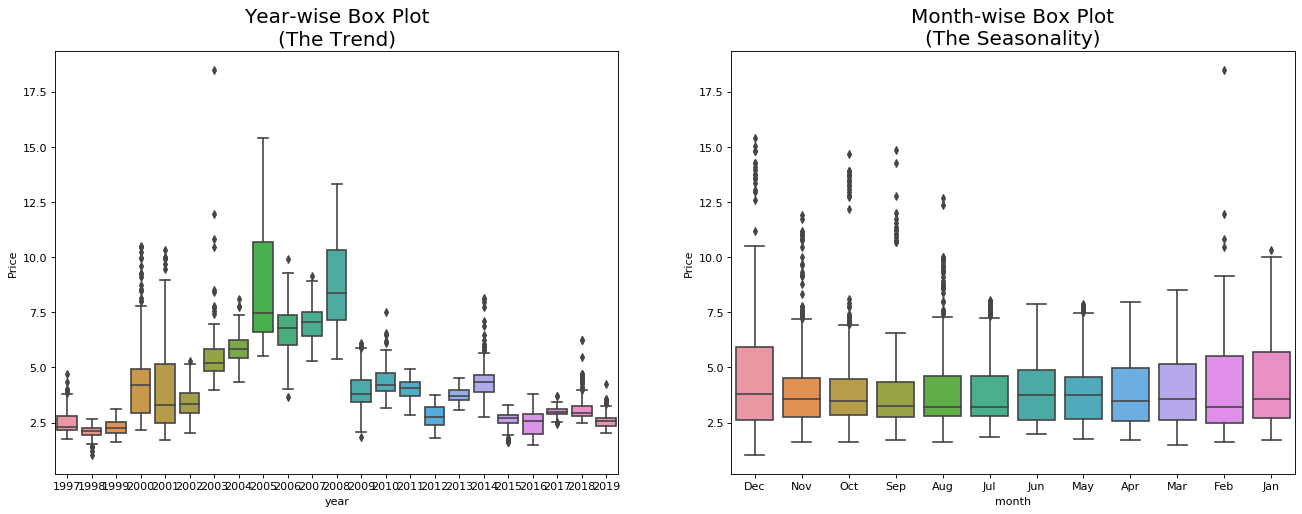

In [5]:
import seaborn as sns

# Find Trend in Yearly, Monthly data
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Price', data=df, ax=axes[0])
sns.boxplot(x='month', y='Price', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [6]:
# Decompose data
# Trend, seasonal and residual components for Monthly data

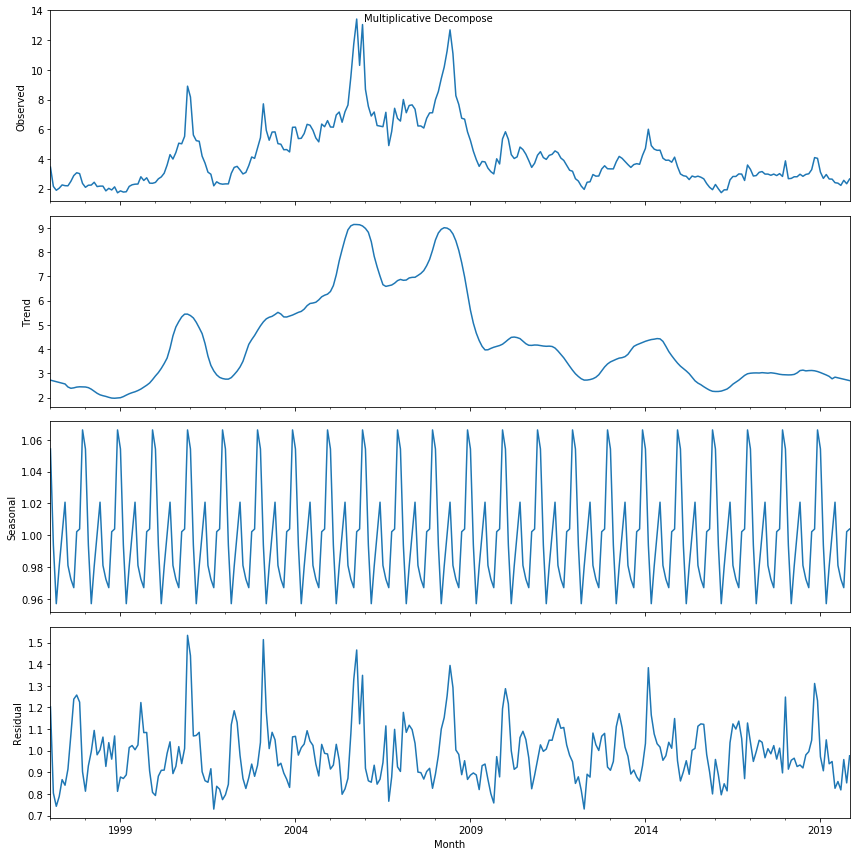

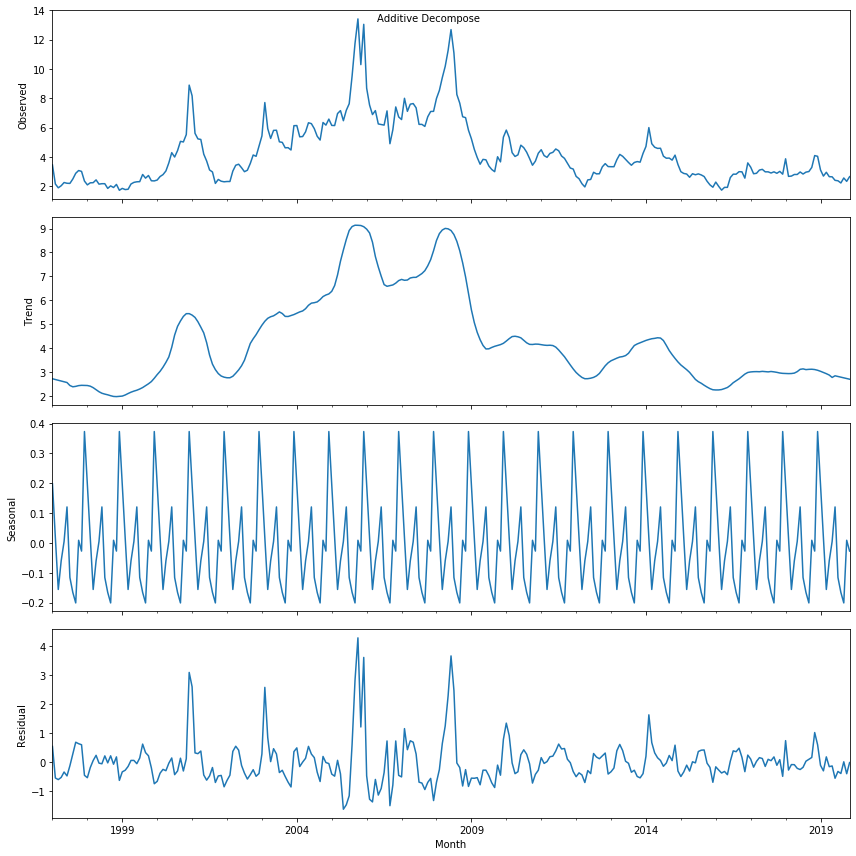

,seas,trend,resid,actual_values
Month,,,,
2019-11-01,1.003951,2.703281,0.976433,2.65
2019-10-01,1.002244,2.731863,0.850988,2.33
2019-09-01,0.967114,2.760446,0.958922,2.56
2019-08-01,0.972467,2.789028,0.818512,2.22
2019-07-01,0.981070,2.817611,0.857369,2.37


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_mon['Price'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_mon['Price'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (12,12)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=10)
result_add.plot().suptitle('Additive Decompose', fontsize=10)
plt.show()

df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

In [8]:
# Test stationary series with Augmented Dickey Fuller test (ADH Test)

from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('../data/price_monthly.csv', header=0, index_col=0, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.177912
p-value: 0.214360
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573


Text(0.5, 1.0, 'Gas Sales detrended by subtracting the least squares fit')

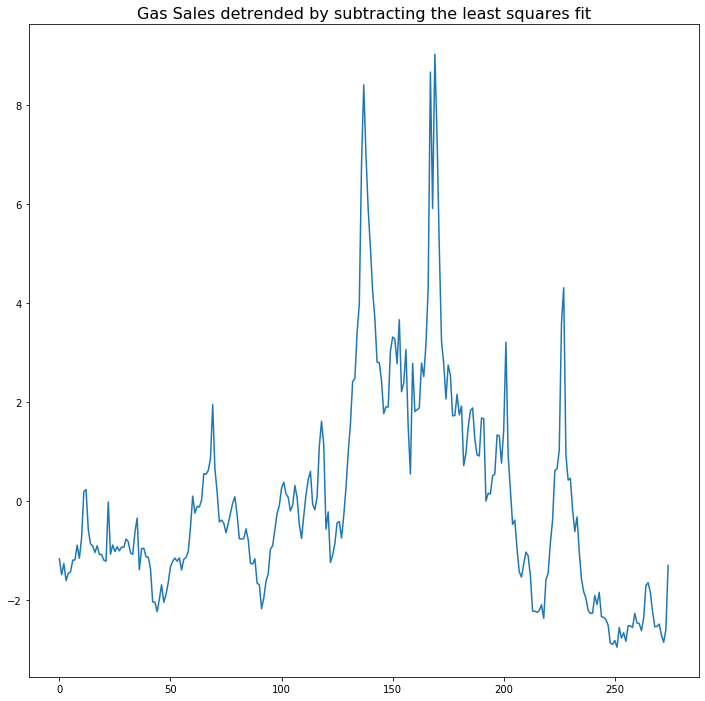

In [9]:
# Using scipy: Subtract the line of best fit

from scipy import signal
detrended = signal.detrend(df_mon.Price.values)
plt.plot(detrended)
plt.title('Gas Sales detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Gas Sales detrended by subtracting the trend component')

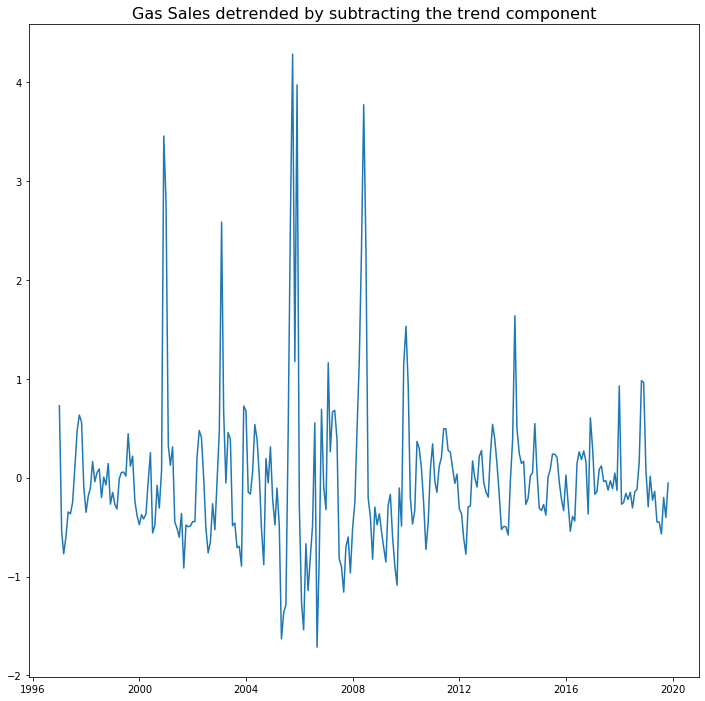

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df_mon['Price'], model='multiplicative', extrapolate_trend='freq')
detrended = df_mon.Price.values - result_mul.trend
plt.plot(detrended)
plt.title('Gas Sales detrended by subtracting the trend component', fontsize=16)

[]

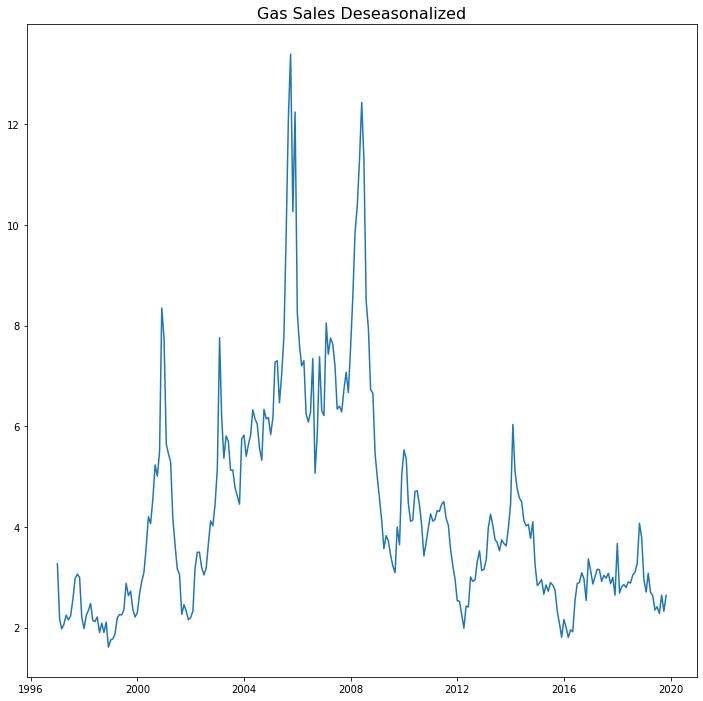

In [11]:
# Deseasonalize a time series - Subtracting the Trend Component

# Time Series Decomposition
result_mul = seasonal_decompose(df_mon['Price'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df_mon.Price.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Gas Sales Deseasonalized', fontsize=16)
plt.plot()

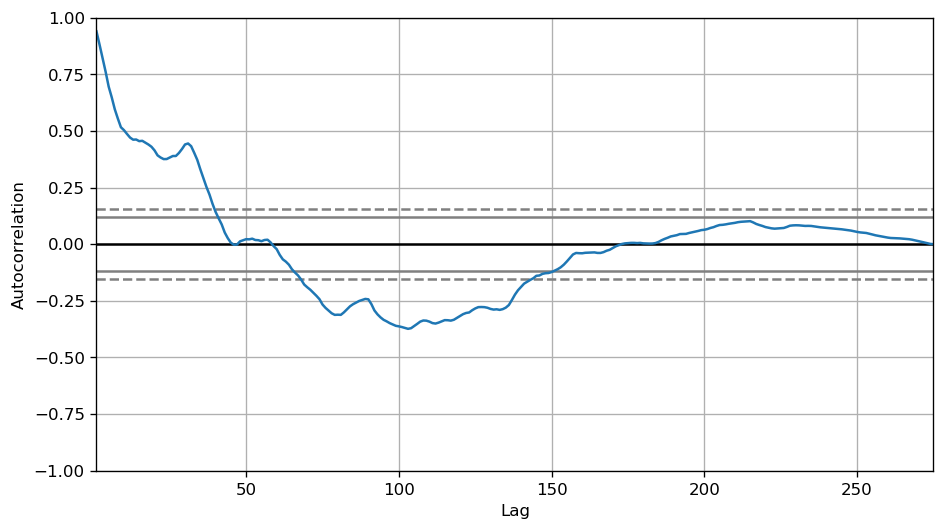

In [12]:
# Test seasonality of a time series
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df_mon.Price.tolist())

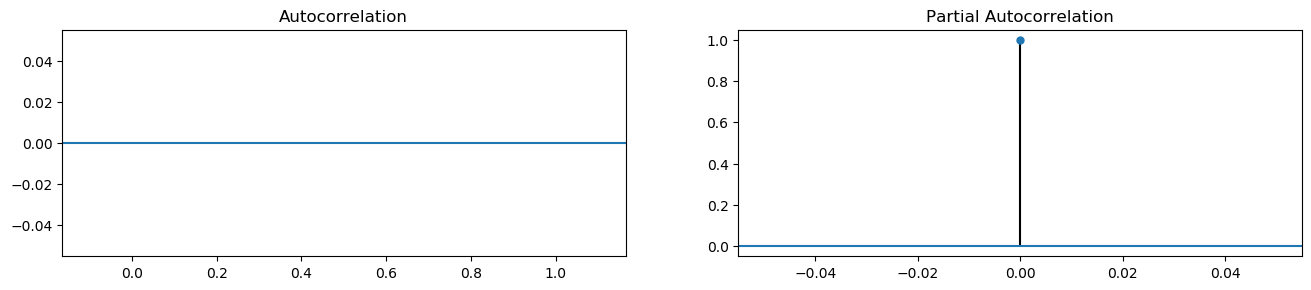

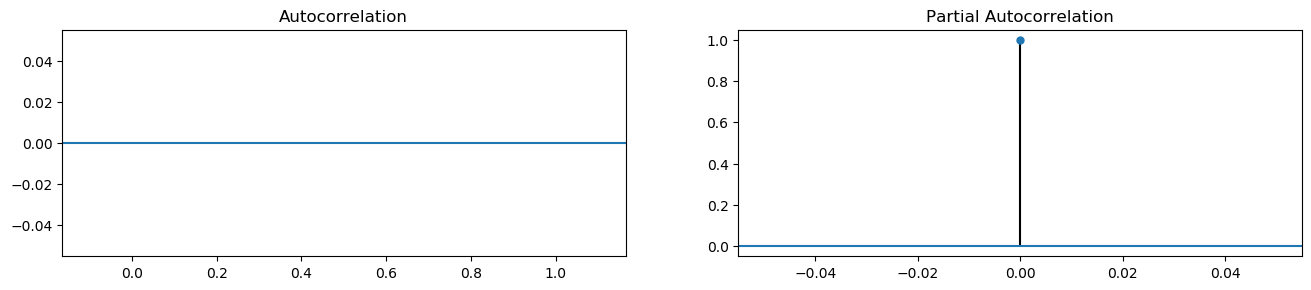

In [13]:
# Check autocorrelation and partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
# For Yearly autocorrelation, detrend not available
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.Price.tolist(), lags=50, ax=axes[0])
plot_pacf(df.Price.tolist(), lags=50, ax=axes[1])

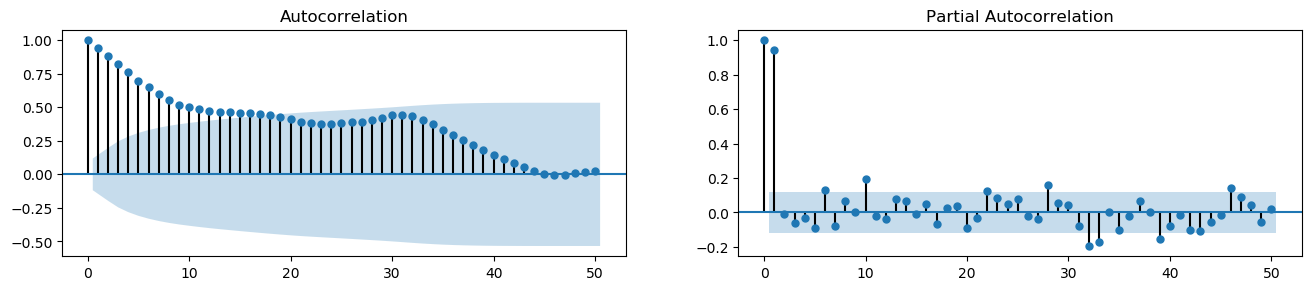

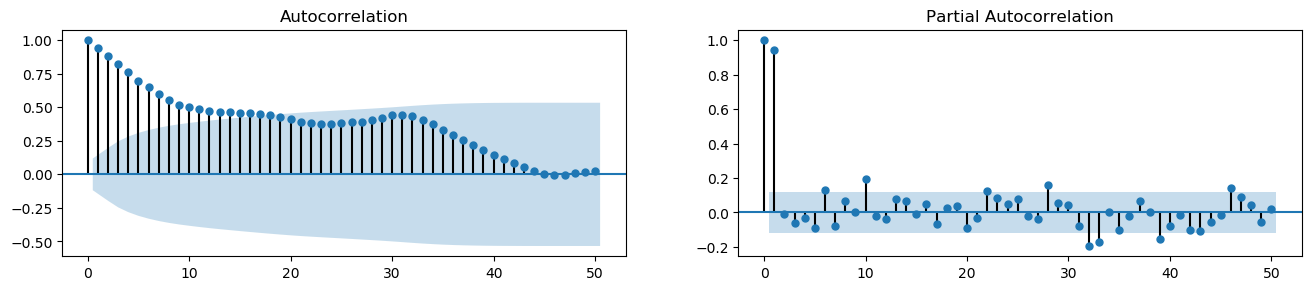

In [14]:
# For monthly
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_mon.Price.tolist(), lags=50, ax=axes[0])
plot_pacf(df_mon.Price.tolist(), lags=50, ax=axes[1])

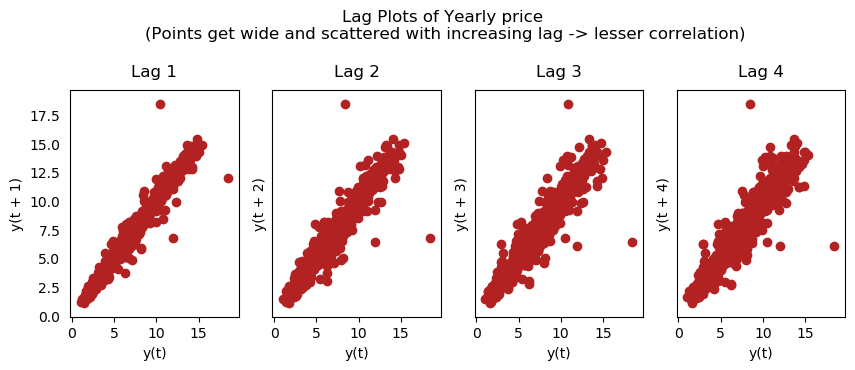

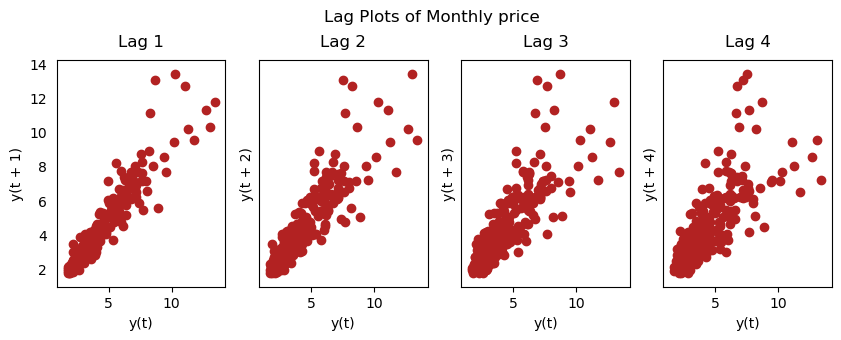

In [15]:
# Scatter plot check autocorrelation
# Validate between deseasonalize (monthly) and seasonalize (yearly) time data

from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.Price, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Yearly price \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df_mon.Price, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Monthly price', y=1.05)    
plt.show()

In [16]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

plt.style.use('fivethirtyeight')

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [17]:
df_mon.head()
df_mon.dtypes

Price    float64
dtype: object

TypeError: float() argument must be a string or a number, not 'datetime.datetime'

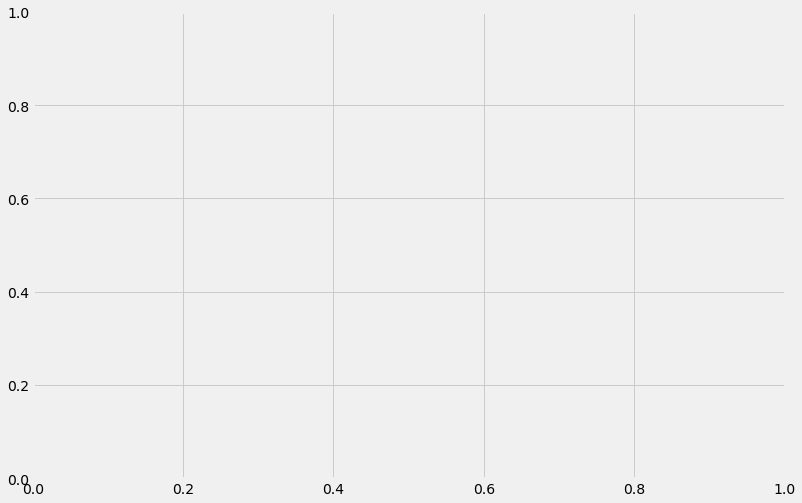

In [18]:
ax = df.set_index('Date').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()